# Half Plots

Here, we first plot the first half of a dataset given by a function and then the second half using the same figure.  
Let $y$ and $f(x)$ be defined as:
$$ y:=f(x):=x(x-2)$$

In [1]:
import numpy as np

In [2]:
x = np.linspace(0, 2, num=100)
y = x*(x-2)
f = lambda x: x*(x-2)
f(1)

-1

The critical point ($CP$) of $f(x)$ should be $\big(1,f(1)\big) = (1,-1)$, and the roots should be $\{0, 2\}$.

## First Half (Frame)


In [3]:
import matplotlib.pyplot as plt

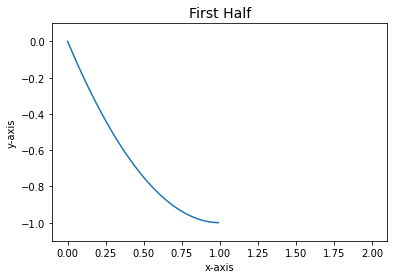

In [4]:
fig, ax = plt.subplots()
ax.set(xlabel='x-axis', ylabel='y-axis')
ax.set_xlim(left=-0.1, right=2.1)
ax.set_ylim(top=0.1, bottom=-1.1)
ax.set_title('First Half', size=14)

C, = ax.plot(x[:50], y[:50])

## Second Half (Frame)

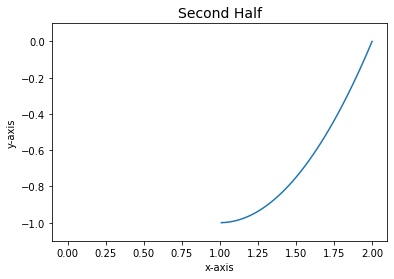

In [5]:
C.set_data(x[50:], y[50:])
ax.set_title('Second Half', size=14)
fig

## Full Plot (Both Frames)

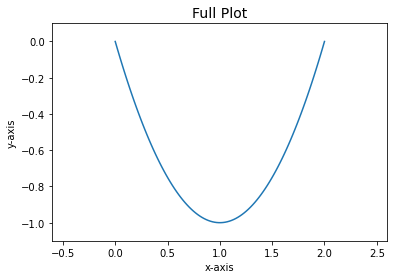

In [6]:
C.set_data(x, y)
ax.set_title('Full Plot', size=14)
ax.set_xlim(left=-0.6, right=2.6)
fig

## Physics

Suppose there is a point moving through the air, under the influence of gravity.  Our point, henceforth '$P$', has a positive initial altitudal velocity $\big(y'(t)\big)$ and a constant non-zero velocity that is perpendicular the altitudal velocity $\big(x'(t)\big)$.  It thus has a vector velocity $\big(\mathbf{P}'(t)\big)$ of:

$$\mathbf{P}':= \mathbf{P}'(t) = x'(t)\mathbf{i} + y'(t)\mathbf{j}$$

and it's path rests on a two dimensional $x, y$ Cartesian plane that is perpendicular to the plane that is tangential to the surface of the Earth at the point of origin of said Cartesian plane.

Now suppose that the initial altitude is ten meters, the maximum altitude is $100$ meters, and $P$ travels $200$ meters in the $x$ direction before falling to the ground.  What is the vector velocity of $P$?

Let $f(x)$ be defined as:
$$ y:=f(x):=ax^2 + bx + c$$

When $x=0$:
$$ y = f(0) = 10\text{m} = c$$

Thus,
$$ y=ax^2+b+10\text{m}$$

When $y=0$, $x=200\text{m}$.
\begin{equation}\tag{1}
    0 = 4\cdot10^4\text{m}^2a +  200\text{m} b + 10\text{m}
\end{equation}    

When $x=\mathrm{CP}_x$, $y=\mathrm{CP}_y=100\text{m}$.

$$ f(\mathrm{CP}_x) = a\mathrm{CP}_x^2 + b\mathrm{CP}_x + 10\text{m} = 100\text{m}$$

The root of $f'(x)$ is of course equal to $\mathrm{CP}_x$.

$$ f'(x) = 2ax + b$$

$$ f'(\mathrm{CP}_x) = 2a\mathrm{CP}_x + b = 0$$

$$ \mathrm{CP}_x = -\frac{b}{2a}$$

Which means that:
$$ f(\mathrm{CP}_x) = \frac{b^2}{4a} - \frac{b^2}{2a} + 10\text{m} = 100\text{m}$$

Multiplying throughout by $4a$ gives:
$$  40\text{m} \cdot a -b^2 = 400\text{m}\cdot a$$

\begin{equation}\tag{2}    
    b^2 = -360\text{m} \cdot a
\end{equation}    

Via the above equation and equation (1),
$$- 4\cdot10^4\text{m}^2 \frac{b^2}{360\text{m}} + 200\text{m}\cdot b + 10\text{m} = 0$$

In [7]:
4e4 / 360

111.11111111111111

To find $b$ we need to solve the quadratic equation:

$$- 111.11b^2 + 200 b + 10 = 0$$

In [22]:
b = {'pos': (- 200 + np.sqrt(200**2 + 4*111.11*10))/(-2*111.11), 
     'neg': (- 200 - np.sqrt(200**2 + 4*111.11*10))/(-2*111.11)}
b

{'pos': -0.048683310541851606, 'neg': 1.8487013107218535}

And, our solution is:
\begin{equation}\tag{3}
\label{eq:b}
    b \approxeq \{-0.0487, 1.849\}
\end{equation}    

Via equation (2), 

In [23]:
a = {'pos': -(b['pos']**2)/360, 'neg': -(b['neg']**2)/360}
print(f'a_pos = {a["pos"]*10**4:.3f}e-4\na_neg = {a["neg"]*10**3:.3f}e-3')

a_pos = -0.066e-4
a_neg = -9.494e-3


$$ a \approxeq 
\begin{cases}\tag{4}
-0.066\cdot10^{-4} \quad \text{if } b \approxeq -0.0487 \\
-9.494\cdot10^{-3} \quad \text{if } b \approxeq 1.849
\end{cases}
$$

Thus we have two pairs of possible values for $(a, b)$:  $(-0.066\cdot10^{-4}, -0.0487)$ and $(-9.494\cdot10^{-3}, 1.849)$.

Let's plot $f(x)$ using both pairs.

### The First Pair

The x-coordinate of the critical point is given by:

In [10]:
CP_x = - b['pos']/(2*a['pos'])
CP_x

-3697.3656474174927

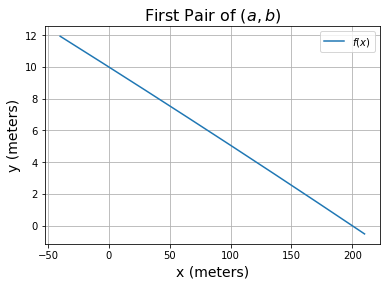

In [11]:
# Plot a=-0.066e-4.

x = np.linspace(-40, 210, num=200)
f = a['pos']*x**2 + b['pos']*x + 10

fig, ax = plt.subplots()
ax.set_title('First Pair of $(a, b)$', size=16)
ax.set_xlabel('x (meters)', size=14)
ax.set_ylabel('y (meters)', size=14)
ax.grid()

ax.plot(x, f, label=r'$f(x)$')
ax.legend()

That did not work, which implies the other pair is the correct one.  The first pair is inconsistent with the notion that:

$$ f(\mathrm{CP}_x) = 100\text{m}$$

In [12]:
f_pos = lambda x: a['pos']*x**2 + b['pos']*x + 10
f_pos(CP_x)

99.99999999999999

$$ f(\mathrm{CP}_x) \approxeq 5.197 \text{m} \ne 100\text{m}$$

### The Second Pair

With the other $(a, b)$ pair we have:

$$y = f(x) = -9.494\cdot10^{-3}x^2 + 1.849 x + 10$$

In [13]:
f_neg = lambda x: a['neg']*x**2 + b['neg']*x + 10
f_neg(200)

-0.003797440595860735

The x-coordinate of the critical point of $f(x)$ is given by:

In [14]:
CP_x = -b['neg']/(2*a['neg'])
CP_x

97.36564741749237

In [15]:
f_neg(CP_x)

100.00000000000001

This is consistent, and verifies that the second pair is the correct one.

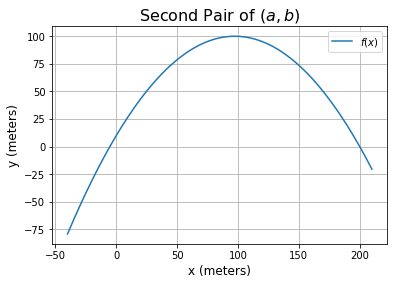

In [16]:
f = a['neg']*x**2 + b['neg']*x + 10

fig, ax = plt.subplots()
ax.set_title('Second Pair of $(a, b)$', size=16)
ax.set_xlabel('x (meters)', size=12)
ax.set_ylabel('y (meters)', size=12)
ax.grid()

ax.plot(x, f, label=r'$f(x)$')
ax.legend()

The above plots data given by $f(x)$ that contains negative $y$ values, but the altitude should always be non-negative.  To fix this, let's limit the domain of $f(x)$ to $[x_\min, x_\max]$, where $x_\min$ and $x_\max = 200\text{m}$ are the roots of $f(x)$.

Since $x_\max$ was given in the presupposition, we only need to find $x_\min$.  Via the quadratic formula,

$$ x_\max = \frac{-b - \sqrt{b^2-4ac}}{2a} = 200\text{m}$$

In [25]:
x_max = (-b-np.sqrt(b**2 - 4*a*10))/(2*a)
x_max

199.99805131621477

And,
$$ x_\min = \frac{-b + \sqrt{b^2-4ac}}{2a}$$

In [20]:
x_min = (-b+np.sqrt(b**2 - 4*a*10))/(2*a)
x_min

-5.266756481230021

$$ x_\min \approxeq -5.267 \text{m}$$

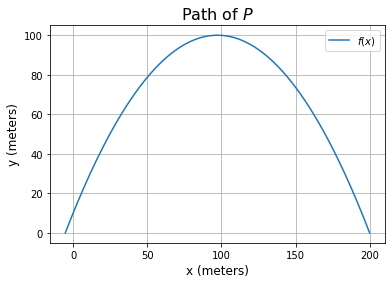

In [26]:
# Redefine the domain of f(x) and subsequently f(x) itself.
x = np.linspace(0, x_max, num=200)
f = a*x**2 + b*x + 10

fig, ax = plt.subplots()
ax.set_title('Path of $P$', size=16)
ax.set_xlabel('x (meters)', size=12)
ax.set_ylabel('y (meters)', size=12)
ax.grid()

ax.plot(x, f, label=r'$f(x)$')
ax.legend()

### Vector Velocity

To find $\mathbf{P}'$, first let's find $\mathbf{P}$.

The altitude (**y-coordinate**) of $P$ or *y-compliment* of $\mathbf{P}$ is given by:

$$ y:=y(t) = G\cdot t^2 + y'(0)\cdot t + 10\text{m}$$

The above function has a critical point ($\mathrm{CP}$) of $(\mathrm{CP}_t,\mathrm{CP}_y=100\text{m})$.  The $t$ coordinate of $\mathrm{CP}$ is equal to the root $y'(t)$.

\begin{equation}\tag{5}
    y(\mathrm{CP}_t) = G \cdot\mathrm{CP}_t^2 + y'(0)\cdot \mathrm{CP}_t + 10\text{m} = 100\text{m}
\end{equation}   

Here, $G$ is equal to half of the acceleration due to gravity near the surface of the Earth.  Since $\mathrm{CP}_t$ is the equal to the root of $y'(t)$:

$$ y'(t) = 2Gt + y'(0) $$

$$ y'(\mathrm{CP}_t) = 2G \cdot \mathrm{CP}_t + y'(0) = 0$$

$$ \mathrm{CP}_t = - \frac{y'(0)}{2G}$$

Via the above equation, equation (5), and substitution,

$$ y(\mathrm{CP}_t) = \frac{\big(y'(0)\big)^2}{4G} - \frac{\big(y'(0)\big)^2}{2G} + 10\text{m} = 100\text{m}$$

Multiplying throughout by $4G$ gives:

$$ \big(y'(0)\big)^2 - 2\big(y'(0)\big)^2 + 40G\text{m} = 400G\text{m}$$

$$ \big(y'(0)\big)^2 = -360G\text{m}$$

Finally, the initial altitudal velocity of $P$ is given by:

$$ y'(0) = \pm \sqrt{-360 G \text{m}} \approxeq \pm \sqrt{360 \cdot 0.5 \cdot 9.8}\frac{\text{m}}{\text{s}} = \pm 42 \frac{\text{m}}{\text{s}}$$

In [27]:
V_yi = np.sqrt(360*0.5*9.8)
V_yi

42.0

We can safely rule out the negative possible value for $y'(0)$ since the point goes up before falling down to Earth.

$$ y'(0) = 42 \frac{\text{m}}{\text{s}}$$

In [28]:
9.8*0.5

4.9

Which leaves us with:

$$ y = y(t) = -4.9\frac{\text{m}}{\text{s}^2} \cdot t^2 + 42\frac{\text{m}}{\text{s}} \cdot t + 10\text{m}$$

\begin{equation}\tag{6}
    y'(t) = -9.8\frac{\text{m}}{\text{s}^2} \cdot t + 42 \frac{\text{m}}{\text{s}}
\end{equation}    

The **x-coordinate** of $P$ or *x-compliment* of $\mathbf{P}$ is given by:

$$ x:=x(t) = x'(t)\cdot t$$

To find $x'(t)$ we need to find the roots of $y(t)$.

In [29]:
import sympy as sp

In [34]:
t = sp.symbols('t')
y = -4.9*t**2 + 42*t + 10
t_max = sp.solve(y, t)[1]
t_max

8.80325380024054

Since time is never negative, we have one value for $t$ to work with.

$$ t_\max \approxeq 8.803 \text{s}$$

$$ x_\max = x(t_\max) = 200\text{m}$$

$$ x(8.803\text{s}) = x'(t) \cdot 8.803\text{s} = 200\text{m}$$

Finally,
\begin{equation}\tag{7}
    x'(t) = \frac{200 \text{m}}{8.803\text{s}} \approxeq 22.72 \frac{\text{m}}{\text{s}}
\end{equation}    

In [33]:
200/8.803

22.719527433829374

### Plotting the Vector Position of $P$

In this subsection we plot the $x$ and $y$ compliments of $\mathbf{P}$.

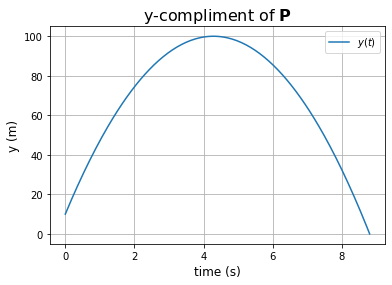

In [38]:
# Plot the y-compliment.
t_max = float(t_max)
t = np.linspace(0, t_max, num=200)
y = -4.9*t**2 + 42*t + 10

fig, ax = plt.subplots()
ax.set_title('y-compliment of $\mathbf{P}$', size=16)
ax.set_xlabel('time (s)', size=12)
ax.set_ylabel('y (m)', size=12)
ax.grid()

ax.plot(t, y, label=r'$y(t)$')
ax.legend()